In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
data_names = ['SOP1.dat', 'SOP2.dat', 'SOP3.dat']
all_data = {}
for file in data_names:
    path_to_data = 'C:/Users/Vladlen/Documents/Python/AtomSkills/data/' + file
    f = open(path_to_data).read()
    all_data[file] = f.split('\n')

In [35]:
len(all_data['SOP1.dat']), len(all_data['SOP2.dat']), len(all_data['SOP3.dat'])

(1044, 1041, 1040)

Удаление технической информации

In [43]:
for data in data_names:
    all_data[data] = all_data[data][1:-1]

In [44]:
all_data

{'SOP1.dat': ['0001 000 035 202 027 029 035 000 000 255 147 054 119 125 212 017 039',
  '0002 000 023 190 027 022 029 000 000 255 147 056 095 156 223 013 027',
  '0003 001 000 188 024 010 013 000 000 255 145 059 040 172 254 010 000',
  '0004 005 000 183 026 006 001 000 000 255 153 066 022 172 255 007 000',
  '0005 004 000 188 032 004 000 000 000 255 157 062 018 170 255 014 021',
  '0006 002 000 190 030 006 000 018 000 255 152 058 004 175 255 008 038',
  '0007 000 000 204 031 009 000 000 000 255 164 052 000 172 255 000 035',
  '0008 000 000 207 029 007 000 000 000 255 159 042 007 146 255 000 047',
  '0009 000 000 187 024 038 000 000 000 255 143 027 018 125 255 000 026',
  '0010 000 000 154 012 000 000 000 000 255 109 003 015 097 249 011 015',
  '0011 000 034 147 008 007 000 000 000 255 115 000 013 093 217 000 018',
  '0012 000 000 126 008 010 000 000 000 255 103 000 002 108 167 002 010',
  '0013 000 000 128 018 017 006 000 000 255 131 002 000 147 144 006 004',
  '0014 000 000 119 033 00

In [69]:
df = pd.DataFrame(columns=['filename', 'index'] + [f'schema_{i}' for i in range(1, 17)])
for data in data_names:
    for values in all_data[data]:
        values_list = values.split(' ')
        values_list = list(map(int, values_list))
        df.loc[len(df), :] = [data] + values_list
df

,filename,index,schema_1,schema_2,schema_3,schema_4,schema_5,schema_6,schema_7,schema_8,schema_9,schema_10,schema_11,schema_12,schema_13,schema_14,schema_15,schema_16
0,SOP1.dat,1,0,35,202,27,29,35,0,0,255,147,54,119,125,212,17,39
1,SOP1.dat,2,0,23,190,27,22,29,0,0,255,147,56,95,156,223,13,27
2,SOP1.dat,3,1,0,188,24,10,13,0,0,255,145,59,40,172,254,10,0
3,SOP1.dat,4,5,0,183,26,6,1,0,0,255,153,66,22,172,255,7,0
4,SOP1.dat,5,4,0,188,32,4,0,0,0,255,157,62,18,170,255,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,SOP3.dat,1034,0,0,0,138,76,30,0,0,1,255,0,15,9,0,0,0
3115,SOP3.dat,1035,0,0,0,134,71,45,0,0,26,255,0,24,2,0,0,0
3116,SOP3.dat,1036,0,0,0,133,63,50,0,0,12,255,0,27,0,0,1,0
3117,SOP3.dat,1037,0,0,0,132,41,47,0,0,5,255,0,27,0,0,0,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3119 entries, 0 to 3118
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filename   3119 non-null   object
 1   index      3119 non-null   object
 2   schema_1   3119 non-null   object
 3   schema_2   3119 non-null   object
 4   schema_3   3119 non-null   object
 5   schema_4   3119 non-null   object
 6   schema_5   3119 non-null   object
 7   schema_6   3119 non-null   object
 8   schema_7   3119 non-null   object
 9   schema_8   3119 non-null   object
 10  schema_9   3119 non-null   object
 11  schema_10  3119 non-null   object
 12  schema_11  3119 non-null   object
 13  schema_12  3119 non-null   object
 14  schema_13  3119 non-null   object
 15  schema_14  3119 non-null   object
 16  schema_15  3119 non-null   object
 17  schema_16  3119 non-null   object
dtypes: object(18)
memory usage: 527.5+ KB


In [75]:
df.describe()

,filename,index,schema_1,schema_2,schema_3,schema_4,schema_5,schema_6,schema_7,schema_8,schema_9,schema_10,schema_11,schema_12,schema_13,schema_14,schema_15,schema_16
count,3119,3119,3119,3119,3119,3119,3119,3119,3119,3119,3119,3119,3119,3119,3119,3119,3119,3119
unique,3,1042,48,170,211,175,256,256,40,55,241,225,114,205,239,254,91,122
top,SOP1.dat,1,0,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0
freq,1042,3,2996,2555,1881,2357,274,438,2973,2942,346,298,2601,914,597,802,1738,849


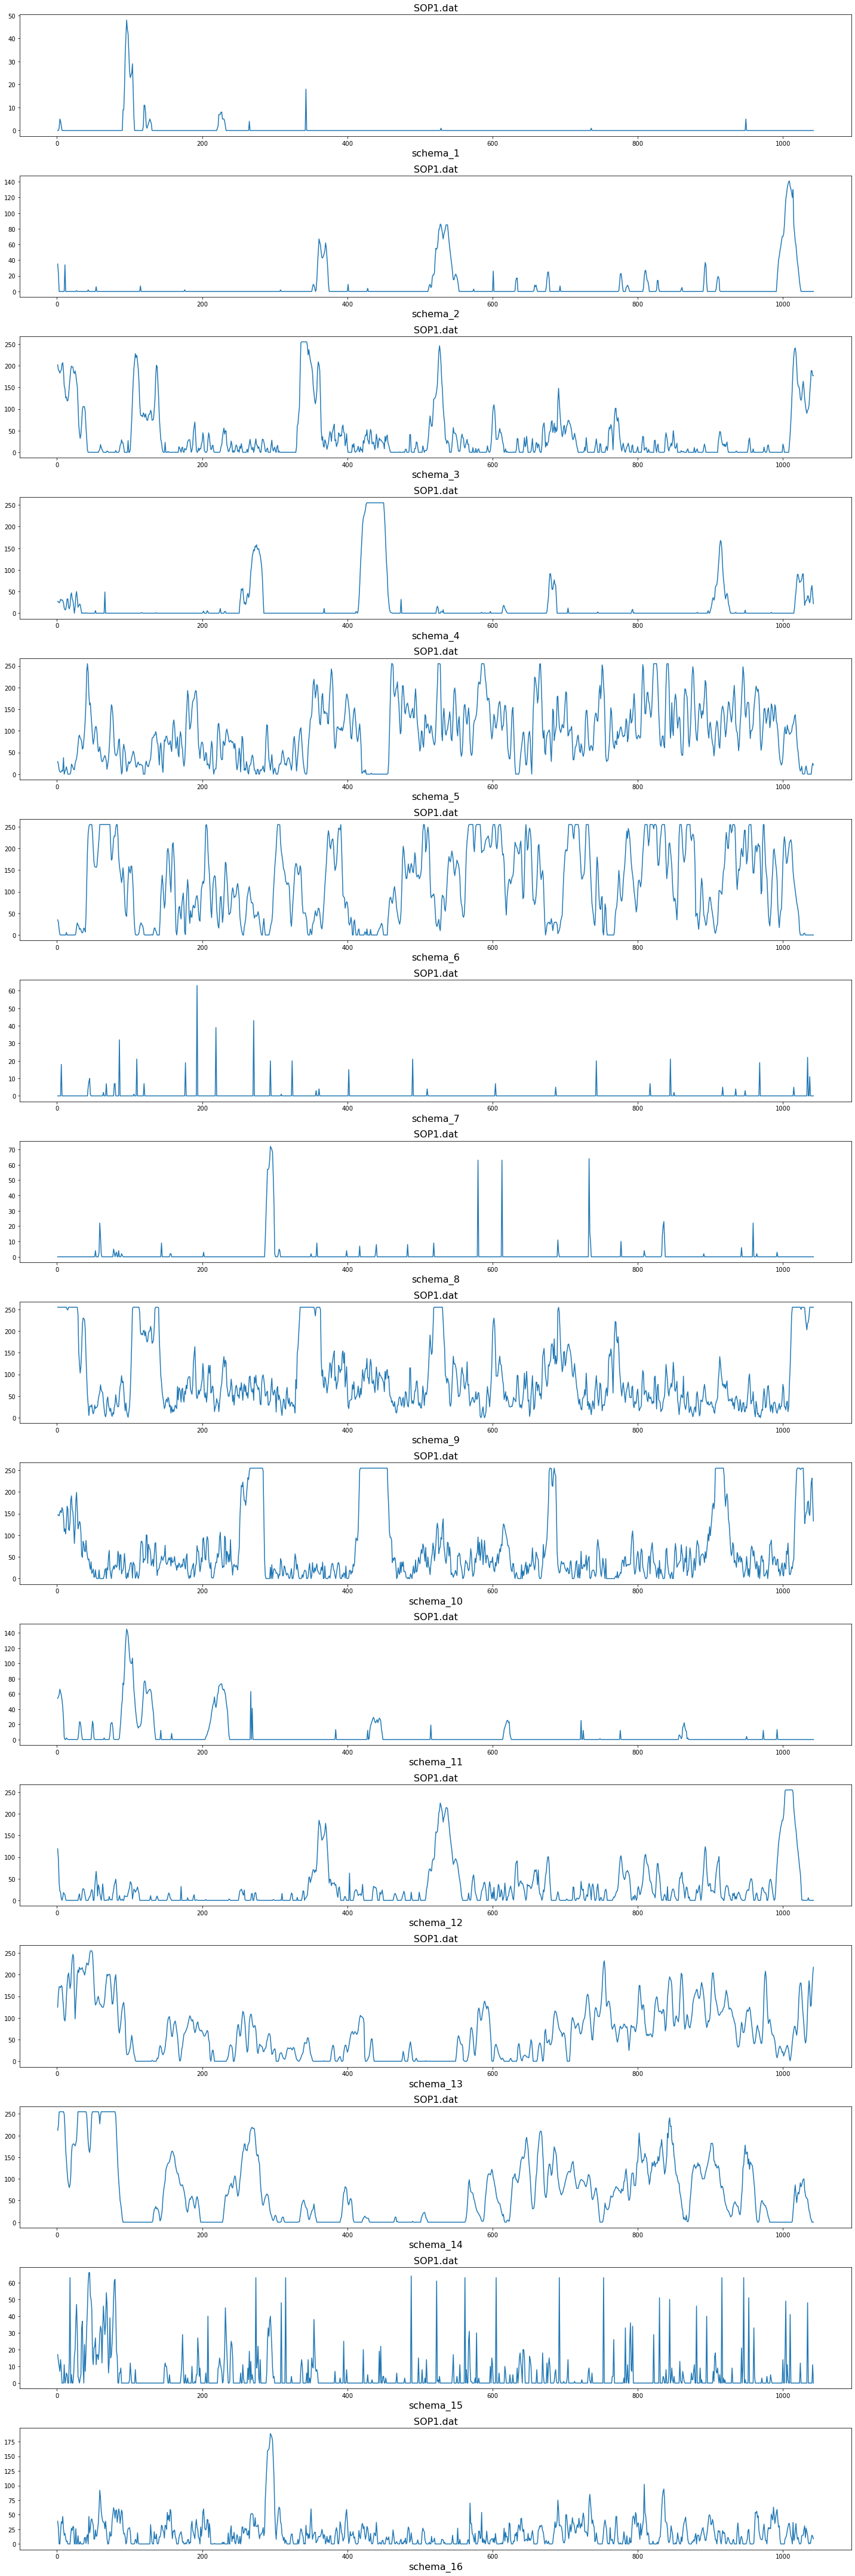

In [115]:
font = 16
fig, axs = plt.subplots(16, 1, figsize=(20, 60))
# fig.suptitle('SOP1.dat', fontsize=14)
for k in range(16):
    axs[k].plot(df[df.filename == 'SOP1.dat']['index'], df[df.filename == 'SOP1.dat'][f'schema_{k+1}'])
    axs[k].set_xlabel(f'schema_{k+1}', fontsize=font)
    axs[k].set_title('SOP1.dat', fontsize=font)
#     sns.lineplot(x='index', y=f'schema_{k}', data=df[df.filename == 'SOP1.dat'])
plt.tight_layout()